# 1.このテキストについて

### テキストの目的
- データ分析の基本的な流れを知る
- データ分析ライブラリのPandasに慣れる

### どのように学ぶか
定番のデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

# 2.フィッシャーのアヤメ

「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。

これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。

1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

In [1]:
# 警告を削除
import warnings
warnings.filterwarnings('ignore')

# 【問題1】データの取得

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# インスタンスを生成
data = load_iris()

# データの確認
print('特徴量')
print(data.data[:5])
print(data.data.shape)
print('')
print('目的変数')
print(data.target[:5])
print(data.target.shape)
print(np.unique(data.target)) # ユニークな要素の値
print(data.target_names)

特徴量
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150, 4)

目的変数
[0 0 0 0 0]
(150,)
[0 1 2]
['setosa' 'versicolor' 'virginica']


In [3]:
# データをDataFrame型でXに格納する。
X = pd.DataFrame(data.data, columns=['sepal_length',
                                     'sepal_width',
                                     'petal_length',
                                     'petal_width'])
# 目的変数も同様にyに格納する。
y = pd.DataFrame(data.target, columns=['Species'])

# 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [4]:
# X,yを結合
df = pd.concat([X, y], axis=1) # axis=1 列方向に結合

# 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。

In [5]:
# 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [6]:
# ラベルごとのサンプル数の合計を出力する。
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
# 特徴量に欠損値があるかを確認する。
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [8]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# 種類ごとの出現個数を確認する。
df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

# 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

### 解答
データセットの中の全てのアイリスは３つのクラスのうち１つに属しており、４つの特徴量を持っている。これらの特徴量が種間で異なるという特性を利用して、新しく見つけたアイリスの種類を予測することがこのデータセットの目的である。

# 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

- sepal_widthの列を３つの異なる方法で抽出する
- 50番目から99番目までのデータを抽出する
- petal_lengthの列の50番目から99番目までのデータを抽出する
- petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

In [10]:
# sepal_widthの列を３つの異なる方法で抽出する
print(df['sepal_width'])
print(df.loc[:, 'sepal_width'])
print(df.iloc[:, 1])

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64


In [11]:
# 50番目から99番目までのデータを抽出する
df.iloc[50:100]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [12]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
df[['petal_length']][50:100]

,petal_length
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


In [13]:
# petal_widthの値が0.2のデータを抽出する
df.loc[df['petal_width']==0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


### .locと.ilocの違い  
.locはラベル名で指定する。  
.ilocは行と列の位置を値で指定する。  

# 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。


- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# グラフのスタイルを設定
sns.set(style='darkgrid')

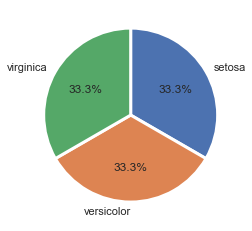

In [15]:
# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
# ラベル名
label = list(data.target_names)

# サンプル数
sample_number = df['Species'].value_counts().sort_index()
             
plt.pie(sample_number, labels=label, counterclock=False, startangle=90, autopct='%.1f%%',
         wedgeprops={'linewidth': 3, 'edgecolor':"white"});

### 補足
counterclock：True に設定すると時計回りで出力。False に設定すると反時計回りで出力。 (デフォルト値: True)

startangle：各要素の出力を開始する角度。 (デフォルト値: None)

autopct：構成割合をパーセンテージで表示。 (デフォルト値: None)

wedgeprops：ウェッジ (くさび形の部分) に関する指定。枠線の太さなどを設定可能。 (デフォルト値: None)

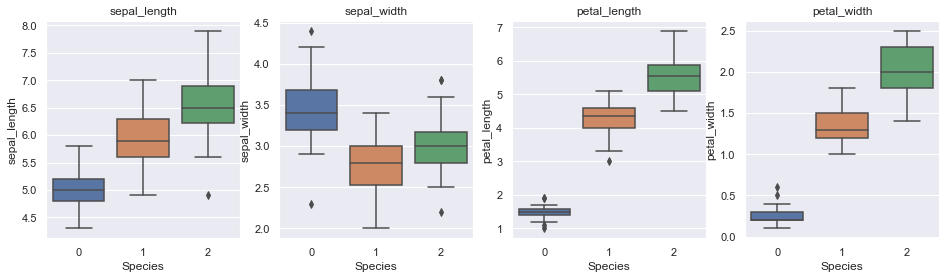

In [16]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
plt.figure(figsize=(16,4))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(1,4,i+1)
    plt.title(col)
    sns.boxplot(x='Species', y=col, data=df)

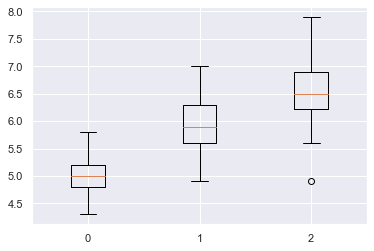

In [17]:
# matplotlibで同じことをするとすごく大変

# ラベルごとに特徴量を分ける
sl_0 = df.loc[df['Species']==0]['sepal_length']
sl_1 = df.loc[df['Species']==1]['sepal_length']
sl_2 = df.loc[df['Species']==2]['sepal_length']

# ラベル名
lab = df['Species'].unique()

# グラフの描画
plt.boxplot([sl_0, sl_1, sl_2], labels=lab);

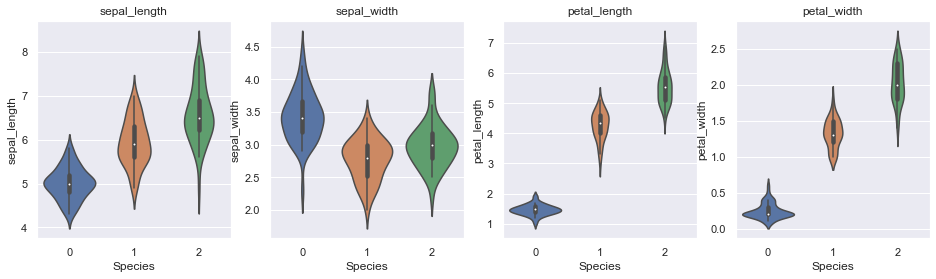

In [18]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
plt.figure(figsize=(16,4))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(1,4,i+1)
    plt.title(col)
    sns.violinplot(x='Species', y=col, data=df)

### 箱ひげ図とバイオリン図の比較
バイオリン図には箱ひげ図よりも多くの情報が含まれる。箱ひげ図には平均/中央値と四分位範囲という要約統計量のみが含まれるのに対し、バイオリンプロットにはすべての分布データが含まれる。これはデータ分布がmultimodal（複数のピークがある）場合に特に有用である。このような場合、バイオリン図では複数のピークの位置と大きさが明確に表現されるが、これは箱ひげ図では表現されない。バイオリン図の内部には平均（または中央値）と四分位範囲が描かれる。特にサンプル数があまり多くない場合には、すべてのサンプルデータが点や線として描かれる場合もある。

箱ひげ図よりも多くの情報が含まれるものの、バイオリン図はよりマイナーである点が欠点である。知名度が低いため、バイオリン図を知らない人にとっては意味が理解しづらい

# 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。

- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

In [19]:
# ラベルと種類の辞書を作成
label_dic = dict(zip(df['Species'].unique().tolist(),
                     data.target_names.tolist()))

# Xにラベルを種類に置き換えた列を追加
X['target_names'] = df['Species'].replace(label_dic)

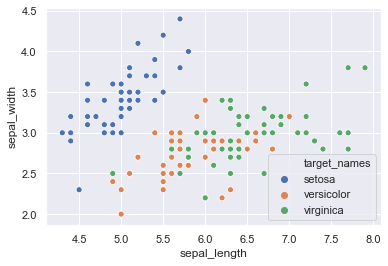

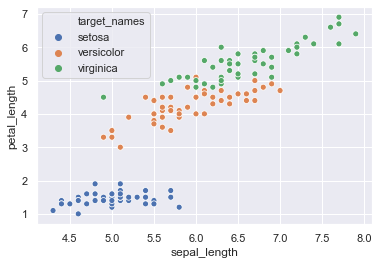

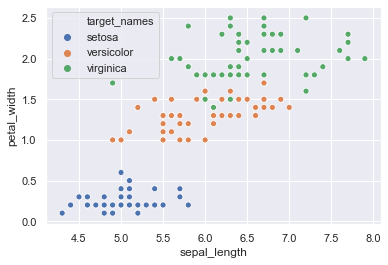

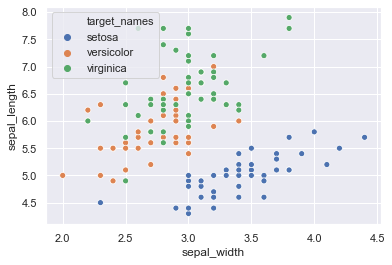

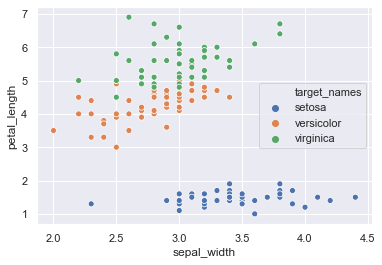

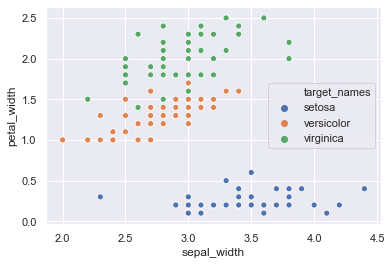

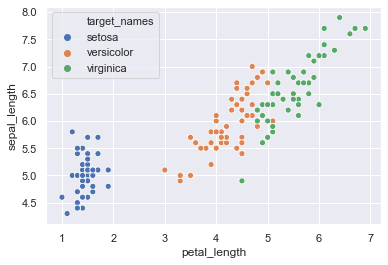

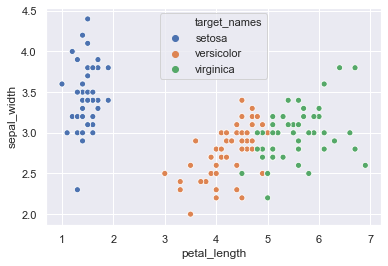

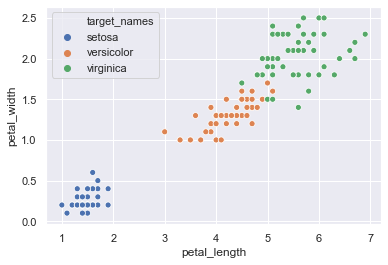

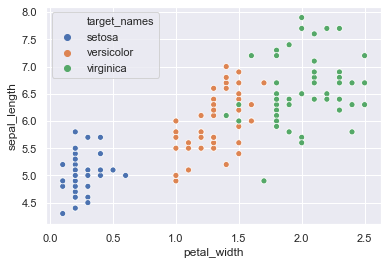

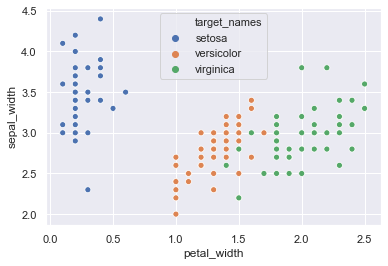

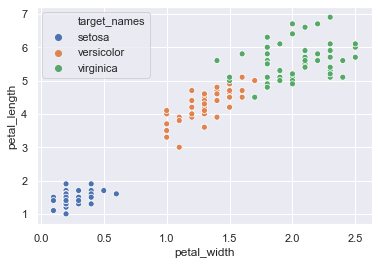

In [20]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
for i in X.columns[:-1]:
    for j in X.columns[:-1]:
        if i != j:
            sns.scatterplot(x=i, y=j, hue='target_names', data=X)
            plt.show()

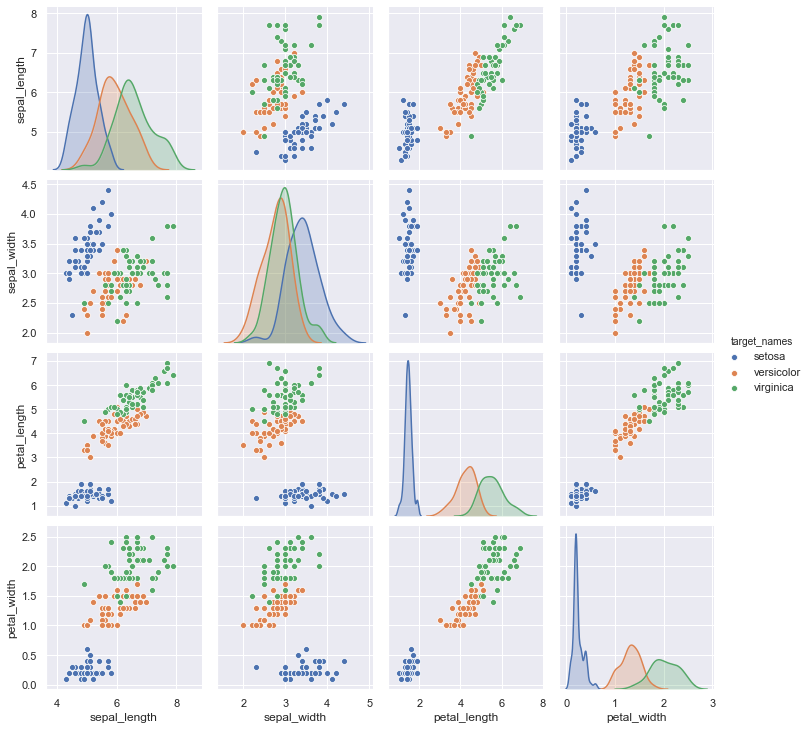

In [21]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
sns.pairplot(X, hue='target_names');

In [22]:
# ４つの特徴量に関する相関係数行列を作る
df_corr = df.iloc[:, :-1].corr()
df_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


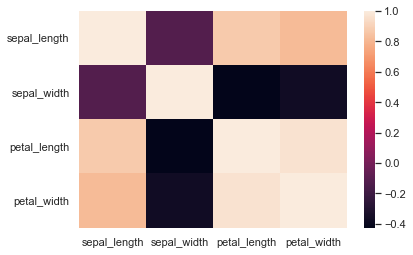

In [23]:
# 相関係数行列のヒートマップを作る。
# seabornのバージョンによってうまく表示されないことがあるので注意
sns.heatmap(df_corr);

# 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

### 解答
- setosaは他の２種類と比べて花弁が短い。  
- virginicaは比較的versicolorよりガクと花弁が長い。  
- 散布図行列から、３つのクラスは比較的よく分離していることがわかる。
- 相関係数行列から、petal_lengthとpetal_widthの相関が非常に強いことがわかる。  

これらは、うまく分類できるように機械学習モデルを訓練することができる可能性が高いことを意味する。